In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.tsa.arima_process as smtsa
import statsmodels.tsa.arima_model as smmodel
import statsmodels.graphics.tsaplots as tsaplots

In [13]:
# Number of samples
n = 600
# Generate MA(1) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

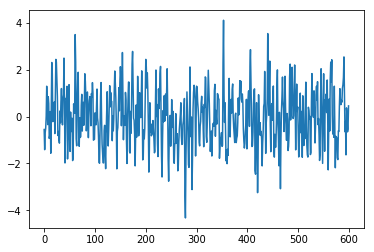

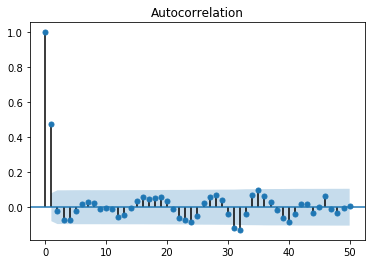

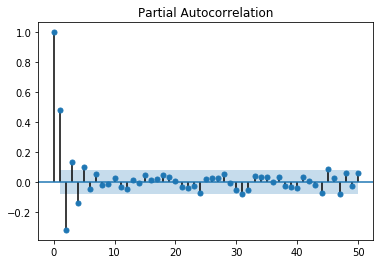

In [14]:
plt.plot(ma1_data)
t1 = tsaplots.plot_acf(ma1_data,lags=50)
t2 = tsaplots.plot_pacf(ma1_data,lags=50)

In [15]:
# Generate MA(2) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

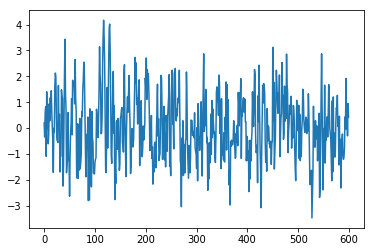

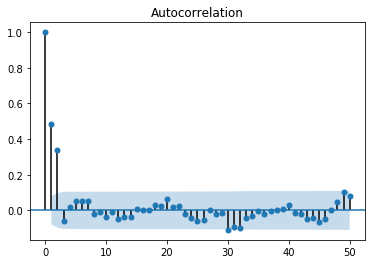

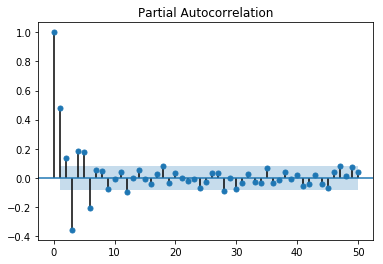

In [16]:
plt.plot(ma2_data)
t1 = tsaplots.plot_acf(ma2_data,lags=50)
t2 = tsaplots.plot_pacf(ma2_data,lags=50)

In [17]:
# Generate MA(3) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

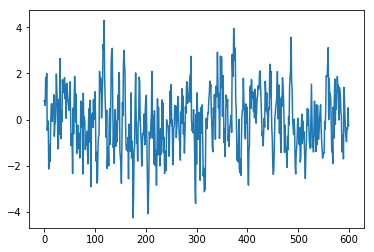

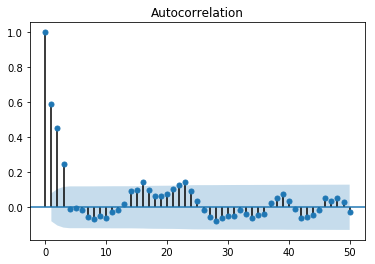

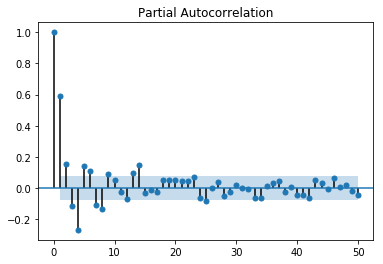

In [18]:
plt.plot(ma3_data)
t1 = tsaplots.plot_acf(ma3_data,lags=50)
t2 = tsaplots.plot_pacf(ma3_data,lags=50)

In [20]:
# Build MA(1) model
ma1 = smmodel.ARMA(ma1_data.tolist(), order=(0, 1)).fit(maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -832.528
Method:                           mle   S.D. of innovations              0.969
Date:                Wed, 27 Mar 2019   AIC                           1669.056
Time:                        17:53:31   BIC                           1677.849
Sample:                             0   HQIC                          1672.479
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6989      0.028     24.557      0.000       0.643       0.755
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4309           +0.0000j            1.4309            0.5000
-----------------------------------------------------------------------------
"""

In [25]:
fcast, stderr, conf_int = ma1.forecast(10)
fcast

array([0.60574522, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])